# Serie VIII - Dominio de Aprendizaje No Supervisado por Agrupación

## E801 - Agrupación del Iris

Replica el caso de uso visto en clase para encontrar las etiquetas usando el algoritmo de K-Means y grafica las etiquetas reales y las encontradas.

In [92]:
import pandas as pd
import os
from os.path import dirname

cwd = dirname(os.getcwd())
iris = pd.read_csv(f"{cwd}/datasets/iris.csv")

X = iris[["sepal.length", "sepal.width", "petal.length", "petal.length"]].values
y = iris["variety"].values

X, y

(array([[5.1, 3.5, 1.4, 1.4],
        [4.9, 3. , 1.4, 1.4],
        [4.7, 3.2, 1.3, 1.3],
        [4.6, 3.1, 1.5, 1.5],
        [5. , 3.6, 1.4, 1.4],
        [5.4, 3.9, 1.7, 1.7],
        [4.6, 3.4, 1.4, 1.4],
        [5. , 3.4, 1.5, 1.5],
        [4.4, 2.9, 1.4, 1.4],
        [4.9, 3.1, 1.5, 1.5],
        [5.4, 3.7, 1.5, 1.5],
        [4.8, 3.4, 1.6, 1.6],
        [4.8, 3. , 1.4, 1.4],
        [4.3, 3. , 1.1, 1.1],
        [5.8, 4. , 1.2, 1.2],
        [5.7, 4.4, 1.5, 1.5],
        [5.4, 3.9, 1.3, 1.3],
        [5.1, 3.5, 1.4, 1.4],
        [5.7, 3.8, 1.7, 1.7],
        [5.1, 3.8, 1.5, 1.5],
        [5.4, 3.4, 1.7, 1.7],
        [5.1, 3.7, 1.5, 1.5],
        [4.6, 3.6, 1. , 1. ],
        [5.1, 3.3, 1.7, 1.7],
        [4.8, 3.4, 1.9, 1.9],
        [5. , 3. , 1.6, 1.6],
        [5. , 3.4, 1.6, 1.6],
        [5.2, 3.5, 1.5, 1.5],
        [5.2, 3.4, 1.4, 1.4],
        [4.7, 3.2, 1.6, 1.6],
        [4.8, 3.1, 1.6, 1.6],
        [5.4, 3.4, 1.5, 1.5],
        [5.2, 4.1, 1.5, 1.5],
        [5

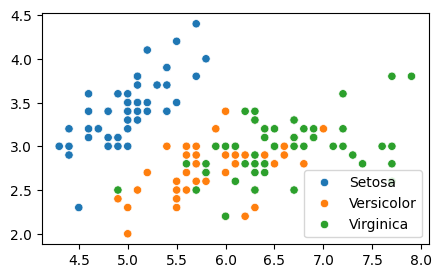

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x= X[:, 0], y=X[:,1], hue=y)
plt.show()

/Users/alexiscortes/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


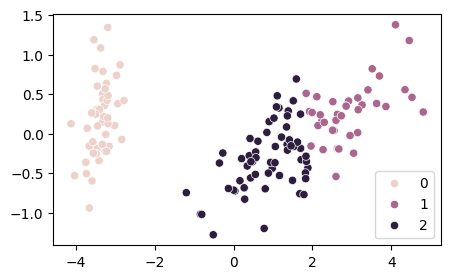

In [94]:
from sklearn.decomposition import PCA
Xp = PCA(n_components=2).fit_transform(X)
from sklearn.cluster import KMeans
clu = KMeans(n_clusters=3)
clu.fit(Xp)
yp = clu.predict(Xp)
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=Xp[:, 0], y=Xp[:, 1], hue=yp)
plt.show()

Modifica el ejercicio para usar el algoritmo de DBSCAN en lugar del algoritmo de K-Means.

In [95]:
from sklearn.neighbors import NearestNeighbors
neighb = NearestNeighbors(n_neighbors=20)
nbrs = neighb.fit(X)
distances, indices = nbrs.kneighbors(X)

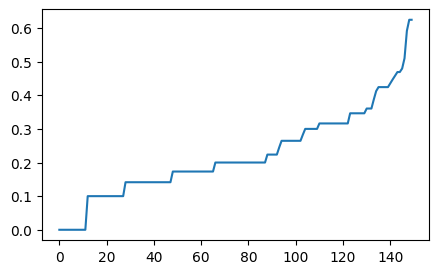

In [96]:
import numpy as np
distances = np.sort(distances, axis = 0)
distances = distances[:, 1]
plt.rcParams['figure.figsize'] = (5,3)
plt.plot(distances)
plt.show()

In [97]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from collections import Counter

min_samples = range(10, 20)
eps = np.arange(0.05, 0.8, 0.01)

output = []
for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(min_samples=ms, eps=ep).fit(Xp).labels_
        clusters = len(Counter(labels))
        if clusters > 1:
            score = silhouette_score(Xp, labels)
            output.append((ms, ep, score))

In [98]:
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]

print(f"Mejor silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"epsilon: {eps}")

Mejor silhouette_score: 0.6579674194165422
min_samples: 19
epsilon: 0.45000000000000007


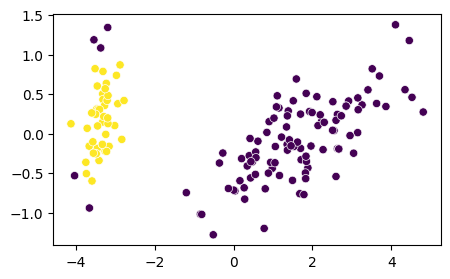

In [99]:
from sklearn.cluster import DBSCAN
clu = DBSCAN(eps=eps, min_samples=min_samples)
clu.fit(Xp)
yp = clu.labels_

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=Xp[:, 0], y=Xp[:, 1], c=yp)
plt.show()

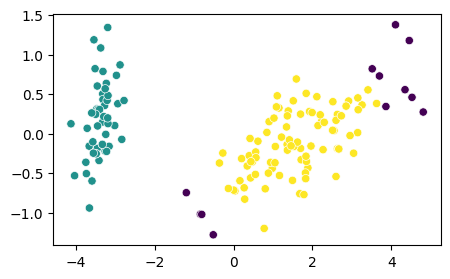

In [100]:
from sklearn.cluster import DBSCAN
clu = DBSCAN(eps=score, min_samples=min_samples)
clu.fit(Xp)
yp = clu.labels_

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=Xp[:, 0], y=Xp[:, 1], c=yp)
plt.show()

## E802 - Agrupación de muchas características

Busca un Dataset con muchas características numéricas, por ejemplo, las reseñas de usuarios o datos de personas.

Determina un máximo de 5 grupos distintos y agrega la predicción del grupo para cada registro.

/Users/alexiscortes/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


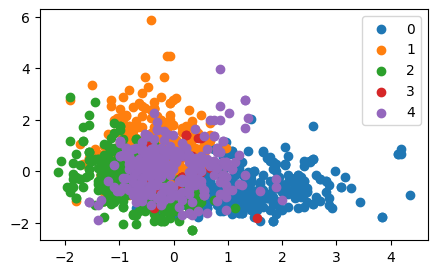

In [107]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import os
from os.path import dirname

cwd = dirname(os.getcwd())
data = pd.read_csv(f"{cwd}/datasets/winequality-red.csv", sep=";")
numeric_features = data.iloc[:, :-1]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(scaled_data)
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(scaled_data[label == i , 0] , scaled_data[label == i , 1] , label = i)
plt.legend()
plt.show()

## E803 - Agrupación de muchas características usando 2 componentes principales

Repite el ejercicio anterior, pero utilizando los primeros 2 componentes principales.

Visualiza las categorías coloreadas.

/Users/alexiscortes/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


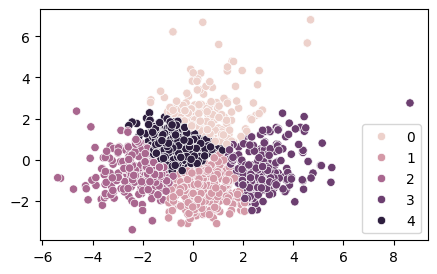

In [110]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
kmeans = KMeans(n_clusters=5)
kmeans.fit(reduced_data)
yp = kmeans.predict(reduced_data)

import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=yp)
plt.show()